In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

df = pd.read_csv("/content/drive/MyDrive/kitri_mlda_24/usedcars.csv")
df.info()
sklearn.__version__

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


'1.5.2'

In [ ]:
df.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [ ]:
transmission = df["transmission"]
transmission.value_counts()

color = df["color"]
color.value_counts()


,count
color,
Black,35
Silver,32
Red,25
Blue,17
Gray,16
White,16
Green,5
Yellow,3
Gold,1


In [ ]:
model = df["model"]
model.value_counts()

# SE model is Standard Edtion
# SES model is Special Edtion Sport
# SEL model is Special Edtion Luxury


,count
model,
SE,78
SES,49
SEL,23


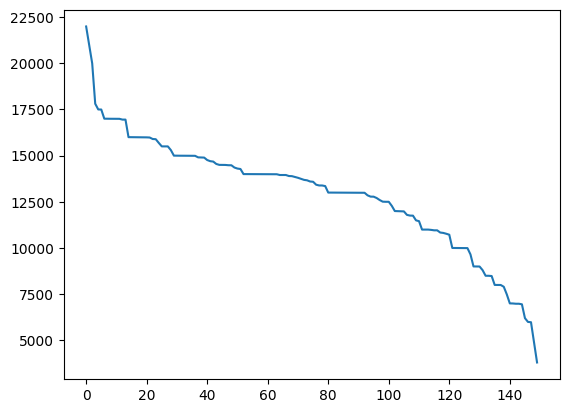

In [ ]:
price = df["price"]
plt.plot(price)

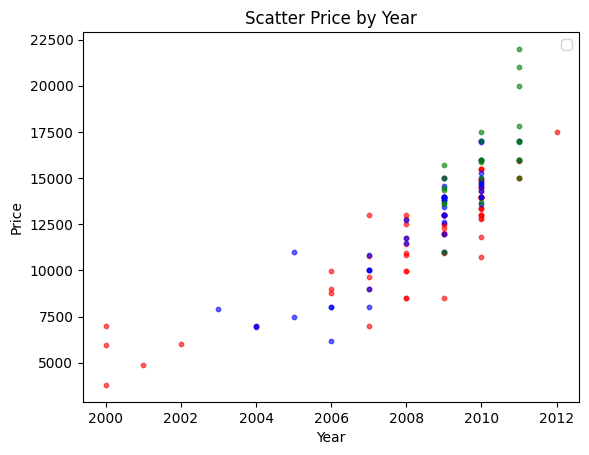

In [ ]:
SE_price = df[df["model"]=="SE"]["price"]
SES_price = df[df["model"]=="SES"]["price"]
SEL_price = df[df["model"]=="SEL"]["price"]

SE_year = df[df["model"]=="SE"]["year"]
SES_year = df[df["model"]=="SES"]["year"]
SEL_year = df[df["model"]=="SEL"]["year"]

# plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, marker='o')
# 연식별 가격 산점도

plt.title("Scatter Price by Year")
plt.scatter(SE_year, SE_price, s=10, alpha=0.6, c="red")
plt.scatter(SES_year, SES_price, s=10, alpha=0.6, c="blue")
plt.scatter(SEL_year, SEL_price, s=10, alpha=0.6, c="green")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/kitri_mlda_24/usedcars.csv")

# One-Hot Encoding 적용
df_encoded = pd.get_dummies(df, columns=["model", "color", "transmission"])

df_encoded.info()

'''
질문
상관관계 분석을 위해 범주형 자료를 Encoding하고 있다.
One-Hot Encoding과 Label Encoding 중, 순서가 있는 자료는 Label Encoding을 적용한다. 이 때 순서가 없는 변수를 One-Hot Encoding 실행할 때 너무 많은 칼럼이 생긴다면
차원의 저주 문제가 발생할 수 있다. 그렇다면 어떤 방법으로 Encoding 해야 하는가?
>> K-Square같은 통계적 기법이나, Domain Knowledge가 있는 전문가의 휴리스틱을 이용해 변수를 쳐내고 진행한다.
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   year                 150 non-null    int64
 1   price                150 non-null    int64
 2   mileage              150 non-null    int64
 3   model_SE             150 non-null    bool 
 4   model_SEL            150 non-null    bool 
 5   model_SES            150 non-null    bool 
 6   color_Black          150 non-null    bool 
 7   color_Blue           150 non-null    bool 
 8   color_Gold           150 non-null    bool 
 9   color_Gray           150 non-null    bool 
 10  color_Green          150 non-null    bool 
 11  color_Red            150 non-null    bool 
 12  color_Silver         150 non-null    bool 
 13  color_White          150 non-null    bool 
 14  color_Yellow         150 non-null    bool 
 15  transmission_AUTO    150 non-null    bool 
 16  transmission_MANUAL  150 n

# wisc_bc 데이터

In [ ]:
!pip install ucimlrepo

### RandomForest는 회귀와 분류가 모두 가능하지만 회귀에는 거의 쓰지 않는다.

+ 연속형 데이터에는 신경망이 월등한 퍼포먼스를 보이기 때문에, RandomForest는 실제로 거의 100% 분류에만 쓰인다.

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from seaborn import heatmap
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
x = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

y.describe()
y.value_counts()

,count
Diagnosis,
B,357
M,212


In [ ]:
# Label Encoding 적용
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 결과를 다시 pandas Series로 변환
y_encoded = pd.Series(y_encoded, name='target')
# B => 0, M => 1로 치환

print(y.value_counts(), y_encoded.value_counts())


Diagnosis
B            357
M            212
Name: count, dtype: int64 target
0    357
1    212
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


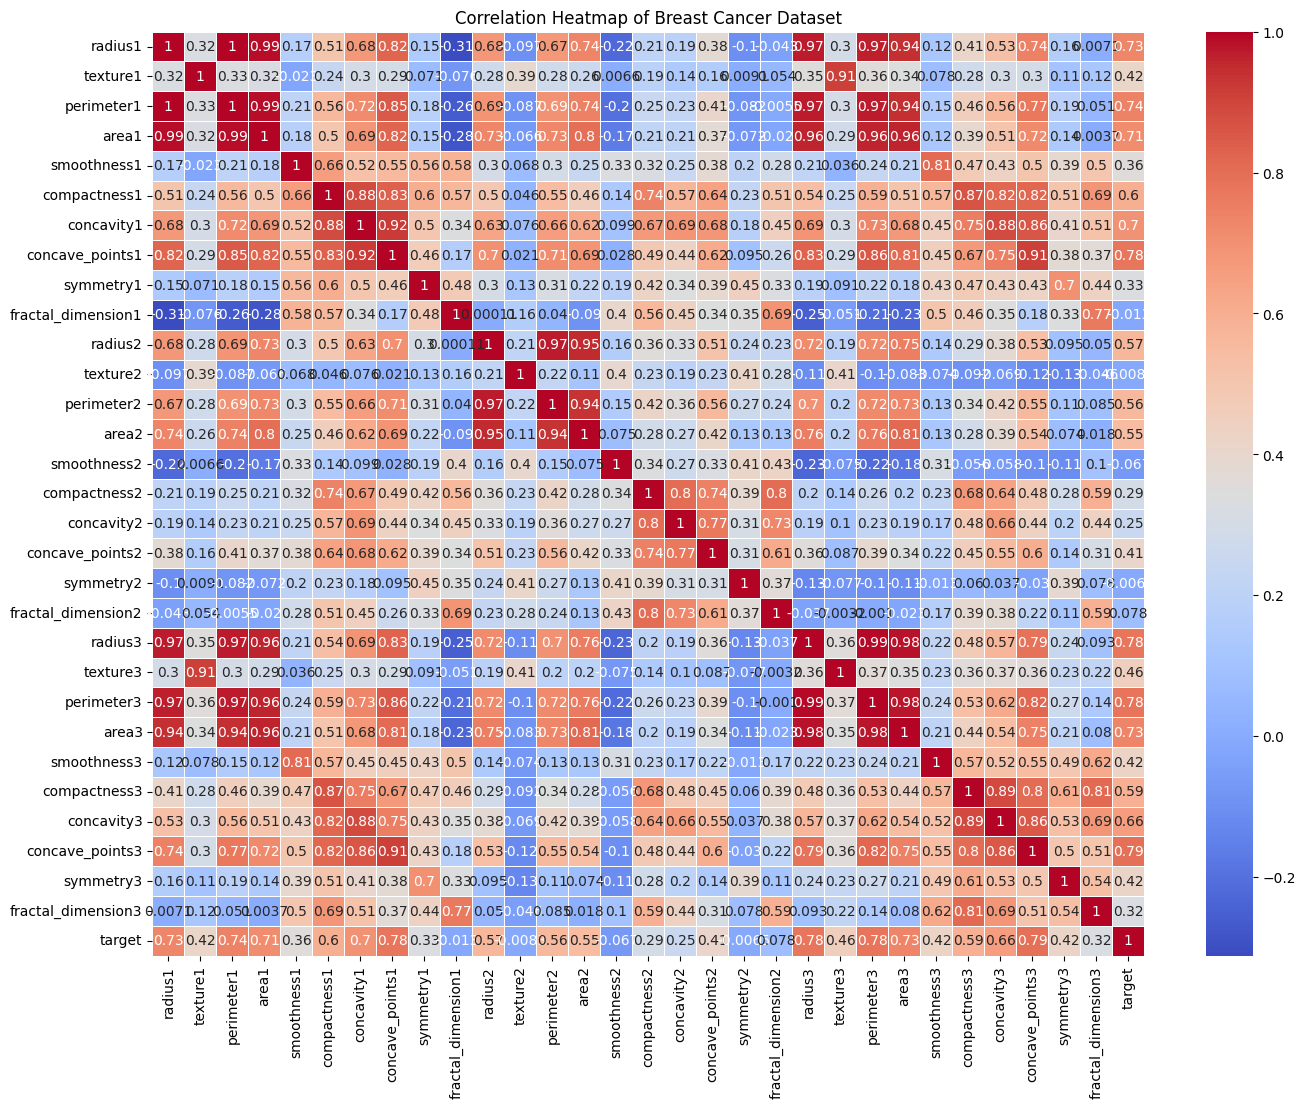

In [ ]:
# Combine features and target for correlation analysis
df = pd.concat([x, y_encoded], axis=1)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()


In [ ]:
'''
target과 상관계수가 0.7 독립변수들
radius1
perimeter1
area1
concavity1
concave_points1
radius3
perimeter3
area3
concave_points3
'''
'''
target과 상관계수가 매우 낮은 독립변수들
fractal_demension1
texture2
smoothness2
symmetry2
fractal_dimension2
'''


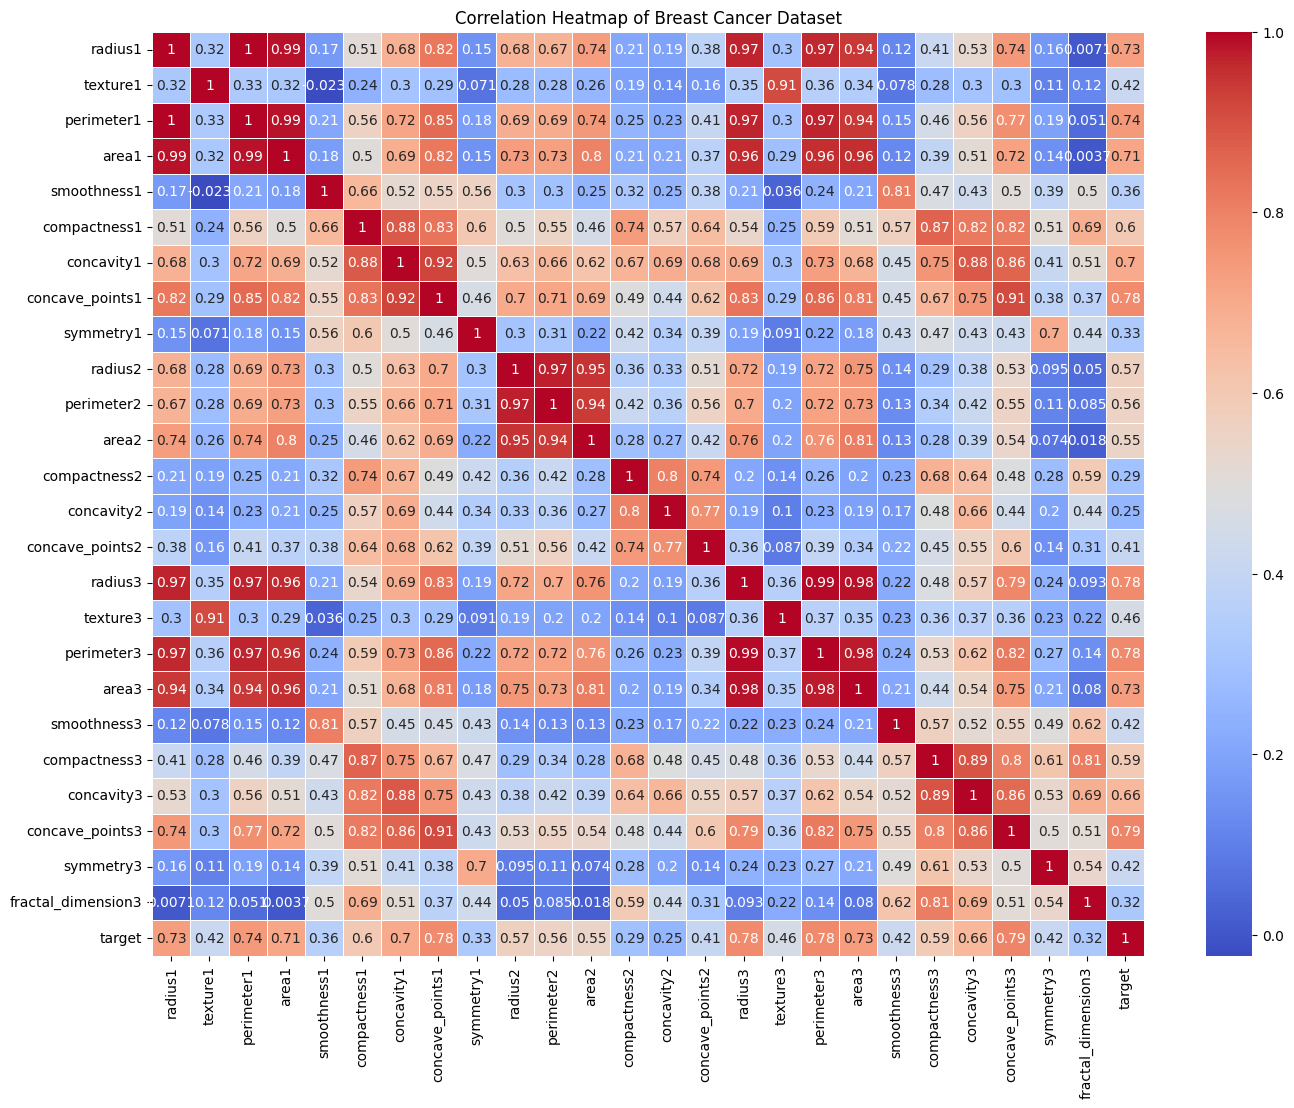

In [ ]:
# Drop columns lower corr
df_edit1 = df.drop(columns=["fractal_dimension1", "texture2", "smoothness2", "symmetry2", "fractal_dimension2"])

# Calculate correlation matrix
correlation_matrix = df_edit1.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()


In [ ]:
# 상관계수기반 차원축소
correlation_matrix = df_edit1.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# 상관계수가 0.9 이상인 변수 제거
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df_edit2 = df_edit1.drop(columns=to_drop)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   smoothness1         569 non-null    float64
 3   compactness1        569 non-null    float64
 4   concavity1          569 non-null    float64
 5   symmetry1           569 non-null    float64
 6   radius2             569 non-null    float64
 7   compactness2        569 non-null    float64
 8   concavity2          569 non-null    float64
 9   concave_points2     569 non-null    float64
 10  smoothness3         569 non-null    float64
 11  compactness3        569 non-null    float64
 12  concavity3          569 non-null    float64
 13  symmetry3           569 non-null    float64
 14  fractal_dimension3  569 non-null    float64
 15  target              569 non-null    int64  
dtypes: float

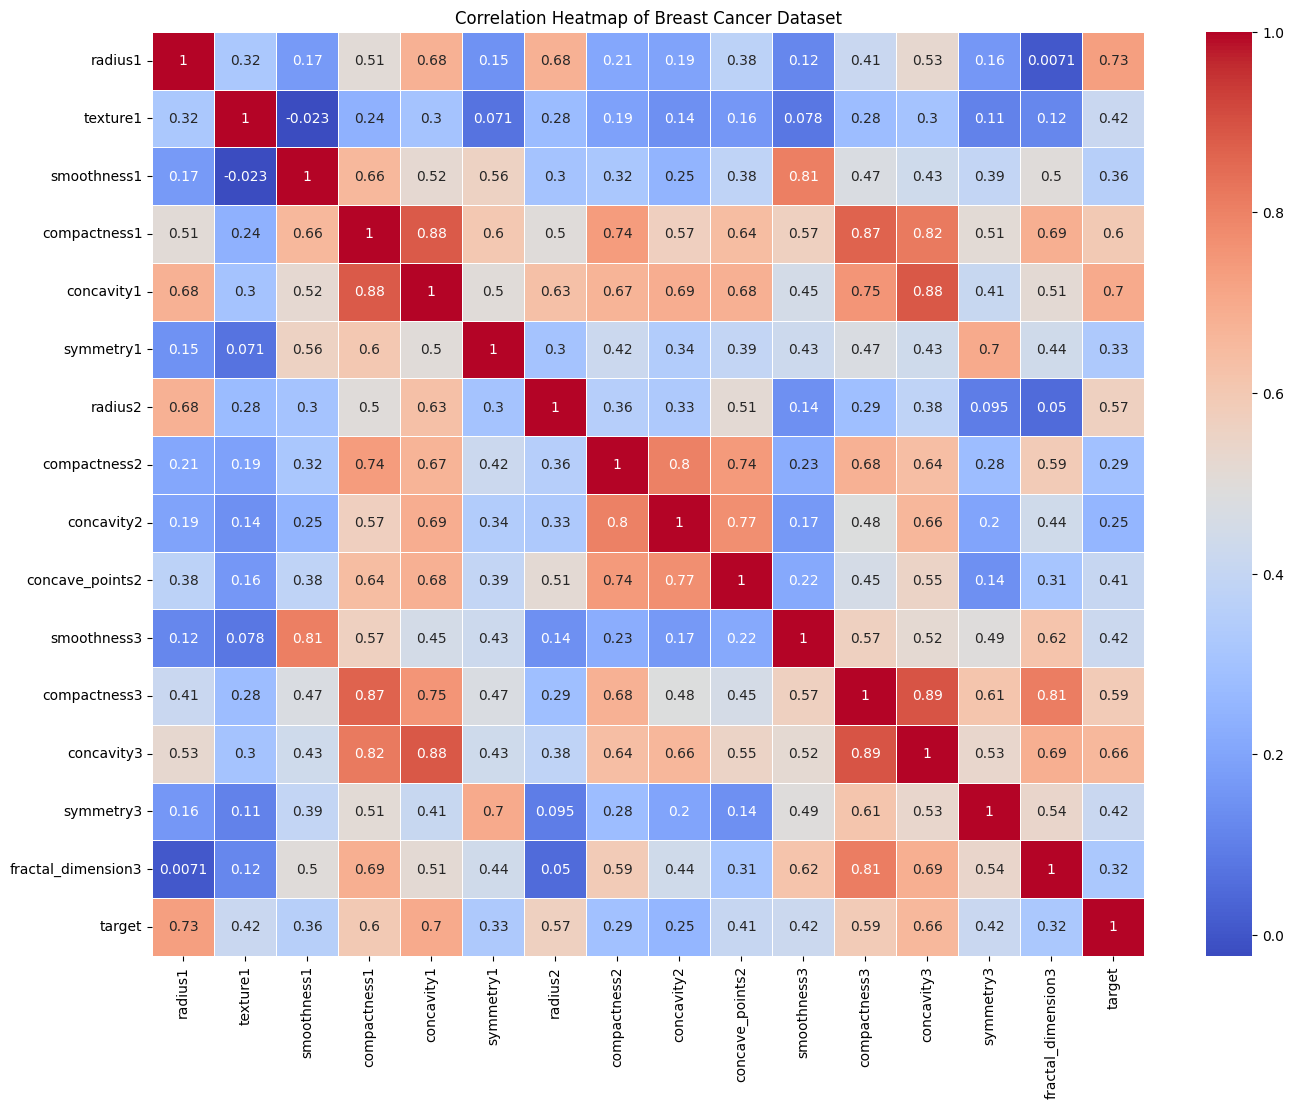

In [ ]:
# Calculate correlation matrix
correlation_matrix = df_edit2.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()


In [ ]:
x_edit1 = df_edit2.drop(columns=["target"])
x_edit1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   smoothness1         569 non-null    float64
 3   compactness1        569 non-null    float64
 4   concavity1          569 non-null    float64
 5   symmetry1           569 non-null    float64
 6   radius2             569 non-null    float64
 7   compactness2        569 non-null    float64
 8   concavity2          569 non-null    float64
 9   concave_points2     569 non-null    float64
 10  smoothness3         569 non-null    float64
 11  compactness3        569 non-null    float64
 12  concavity3          569 non-null    float64
 13  symmetry3           569 non-null    float64
 14  fractal_dimension3  569 non-null    float64
dtypes: float64(15)
memory usage: 66.8 KB


<ipython-input-87-6c04755a8f0b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


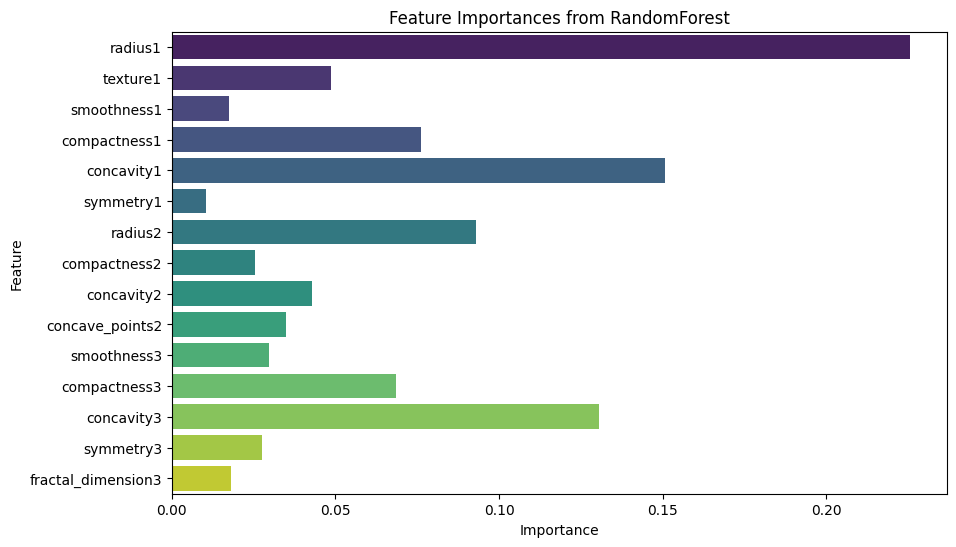

In [ ]:
# 랜덤 포레스트를 사용해 변수 중요도 확인
model = RandomForestClassifier()
model.fit(x_edit1, y_encoded)
importances = model.feature_importances_
feature_names = x_edit1.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from RandomForest')
plt.show()


## 상관계수 기반 차원축소까지 진행한 후 독립변수 15개를 이용해 target변수 Random Forest모델로 예측


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
[[69  2]
 [ 3 40]]


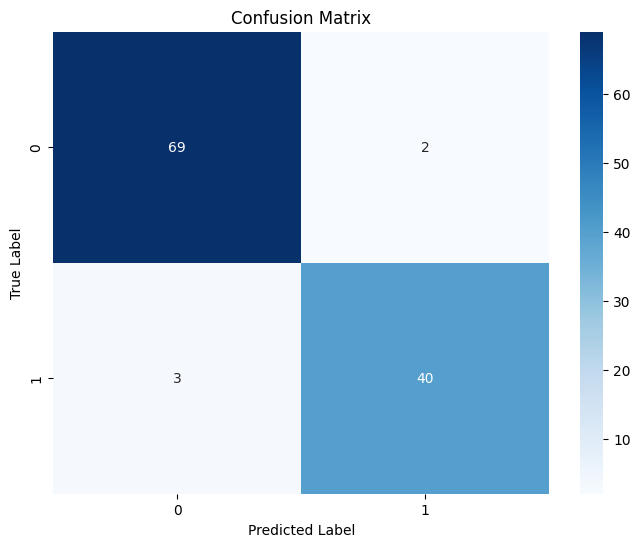

In [ ]:
# 데이터셋 분할 (train, test)
# 데이터 개수는 569개로 가정하고, train:test 비율을 80:20으로 분할
test_size = 0.2  # 20%를 테스트 세트로 사용
x_train, x_test, y_train, y_test = train_test_split(x_edit1, y_encoded, test_size=test_size, random_state=42)

# 랜덤 포레스트 모델 학습 (x_edit1 사용)
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# VIF값 확인 및 제거
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_result = calculate_vif(x_edit1)

# 가장 높은 VIF값을 가지는 smoothness1 제거
x_edit2 = x_edit1.drop(columns=["smoothness1"])
vif_result = calculate_vif(x_edit2)

# 가장 높은 VIF값을 가지는 symmetry1 제거
x_edit3 = x_edit2.drop(columns=["symmetry1"])
vif_result = calculate_vif(x_edit3)

# 가장 높은 VIF값을 가지는 fractal_dimension3 제거
x_edit4 = x_edit3.drop(columns=["fractal_dimension3"])
vif_result = calculate_vif(x_edit4)

# 가장 높은 VIF값을 가지는 compactness1 제거
x_edit5 = x_edit4.drop(columns=["compactness1"])
vif_result = calculate_vif(x_edit5)

# 가장 높은 VIF값을 가지는 concavity3 제거
x_edit6 = x_edit5.drop(columns=["concavity3"])
vif_result = calculate_vif(x_edit6)
print(vif_result)

# VIF값이 높은 독립변수 5개를 차례로 제거

           Feature        VIF
0          radius1  35.244716
1         texture1  22.270803
2       concavity1  16.035732
3          radius2   8.130903
4     compactness2  16.107796
5       concavity2  10.737771
6  concave_points2  17.045343
7      smoothness3  36.933247
8     compactness3  19.634063
9        symmetry3  35.538776


In [ ]:
# VIF값이 높은 5개의 독립변수를 제거한 10개의 독립변수로 새로 모델 예측
# 이전의 모델은 test_size를 극단적으로 줄여도 accuracy가 90%이상으로 측정이 되어 과적합이 의심되었음
# 데이터셋 분할 (train, test)
# 데이터 개수는 569개로 가정하고, train:test 비율을 80:20으로 분할
# 11. 1. 작업예정
test_size = 0.2  # 20%를 테스트 세트로 사용
x_train, x_test, y_train, y_test = train_test_split(x_edit1, y_encoded, test_size=test_size, random_state=42)

# 랜덤 포레스트 모델 학습 (x_edit1 사용)
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
